In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 22 11:13:14 2018

@author: lequang
"""
from __future__ import division

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



def infection_model(network, p, flights, start_node):

    #Create dataframe storing airport and infection time 
    airports = sorted(network.nodes())
    inf_time = np.full((len(airports),), np.inf)
    infection = pd.DataFrame({"Airport":airports, "InfectionTime": inf_time}) 
    
    #Set the infection time of first infected node:
    infection.InfectionTime[start_node] = flights.StartTime.min()
    #Loop over flights and start infection 
    for i in range(len(flights)):
        source = flights.Source[i]
        source_inf_time = infection.InfectionTime[source]
        if (source_inf_time < flights.StartTime[i]):
            random = np.random.rand()
            if random <= p:
                target = flights.Destination[i]
                target_cur_inf_time = infection.InfectionTime[target]
                target_new_inf_time = flights.EndTime[i]
                if target_new_inf_time < target_cur_inf_time:
                    infection.InfectionTime[target] = target_new_inf_time
    return infection


flights = pd.read_csv("./events_US_air_traffic_GMT.txt", sep = " ")

#Read in network data
networkpath = "./aggregated_US_air_traffic_network_undir.edg"
network = nx.read_weighted_edgelist(networkpath, nodetype = int )

#Run model with p = 1
start_node_0 = flights.Source[0] #Initiate the first infected node
flights = flights.sort_values("StartTime")
start_time = flights.StartTime.min() #First infected time
end_time = flights.EndTime.max()


infection = infection_model(network, 1 ,flights, start_node_0)
infection_times = infection.InfectionTime

print("Anchorage infection time: ",infection.InfectionTime[41])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Anchorage infection time:  1229290800.0


In [5]:
n_repeat = 50
n = len(network)
time = np.zeros((len(network),n_repeat), dtype=float)
for i in range(n_repeat):
    start_node = np.random.randint(0,n) 
    infection_i = infection_model(network, 0.5 ,flights, start_node)
    time[:,i] = infection_i.InfectionTime
time_median = np.average(time,axis = 1)
print(time_median)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[1.22934384e+09 1.22931736e+09 1.22931284e+09 1.22930471e+09
 1.22929630e+09 1.22931029e+09 1.22937064e+09 1.22930674e+09
 1.22932161e+09 1.22934981e+09 1.22931707e+09 1.22932374e+09
 1.22930768e+09 1.22932809e+09 1.22932322e+09 1.22931637e+09
 1.22931539e+09 1.22935193e+09 1.22935272e+09 1.22931819e+09
 1.22931544e+09 1.22931826e+09 1.22932230e+09 1.22932100e+09
 1.22931615e+09 1.22931813e+09 1.22931880e+09 1.22931611e+09
 1.22931823e+09 1.22932105e+09 1.22932405e+09 1.22930517e+09
 1.22931658e+09 1.22931719e+09 1.22931038e+09 1.22939120e+09
 1.22936848e+09 1.22933153e+09 1.22931983e+09 1.22935763e+09
            inf 1.22934028e+09 1.22942222e+09 1.22936891e+09
 1.22937357e+09 1.22933480e+09 1.22932473e+09 1.22931249e+09
 1.22931551e+09 1.22931442e+09 1.22931539e+09 1.22936963e+09
 1.22942321e+09 1.22938587e+09 1.22948100e+09 1.22934145e+09
 1.22934773e+09 1.22941420e+09 1.22942196e+09 1.22943807e+09
 1.22935749e+09 1.22933784e+09 1.22932917e+09 1.22931990e+09
 1.22932045e+09 1.229321

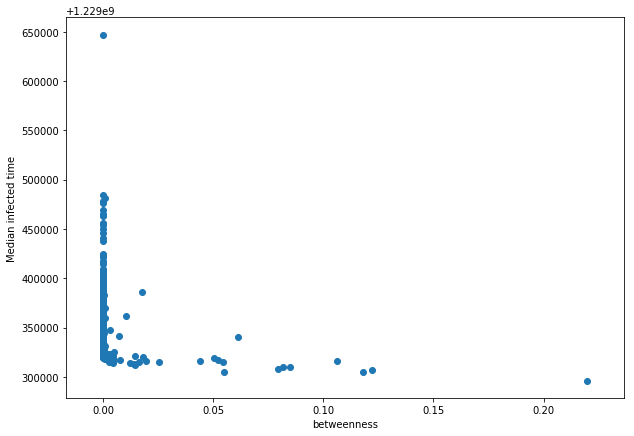

Spearman coef betweenness : SpearmanrResult(correlation=-0.7062076311515392, pvalue=1.949176427846998e-43)


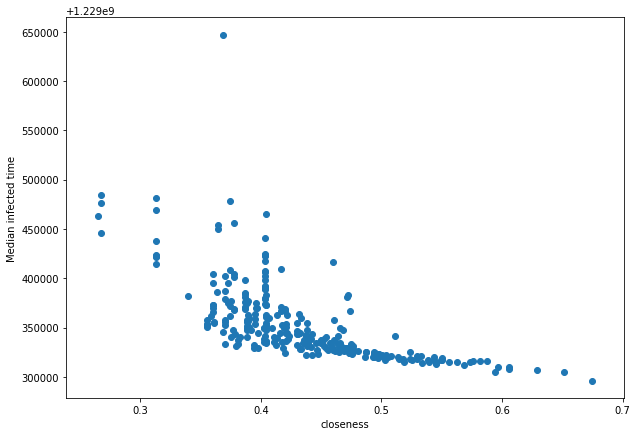

Spearman coef closeness : SpearmanrResult(correlation=-0.8204383897647283, pvalue=3.2244235268871984e-69)


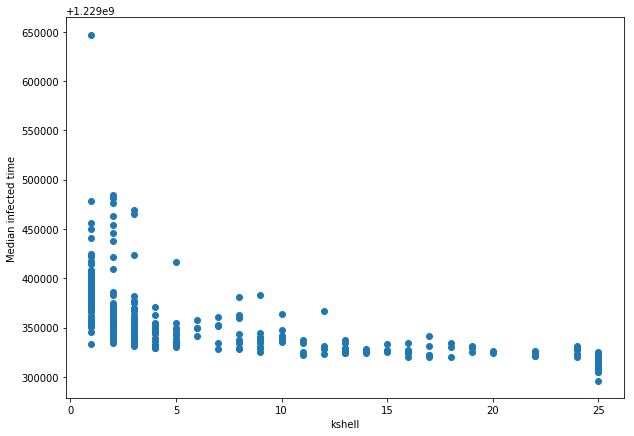

Spearman coef kshell : SpearmanrResult(correlation=-0.8657892409361307, pvalue=2.8535866871315967e-85)


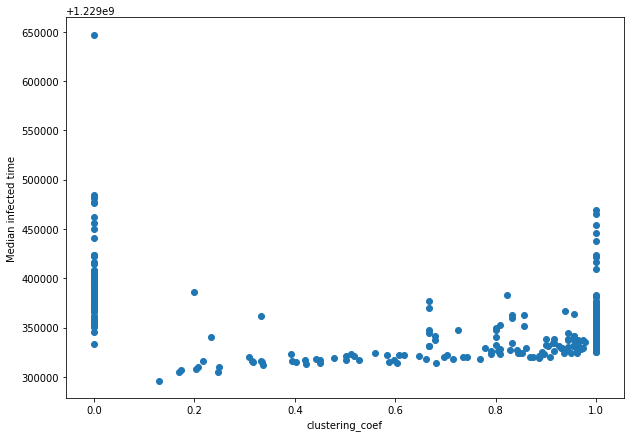

Spearman coef clustering_coef : SpearmanrResult(correlation=-0.11490815277147311, pvalue=0.055227484165663435)


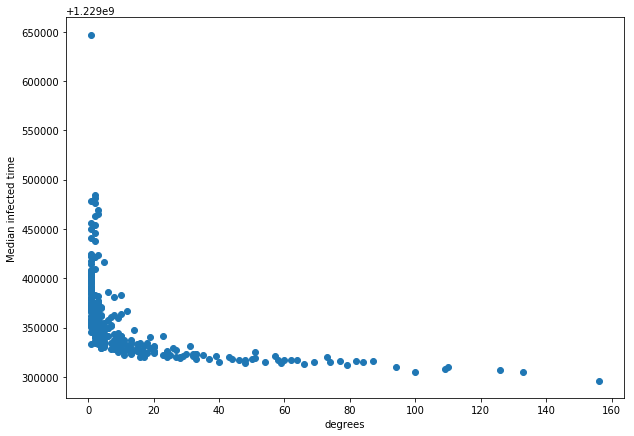

Spearman coef degrees : SpearmanrResult(correlation=-0.8633122505059004, pvalue=2.9972271966328646e-84)


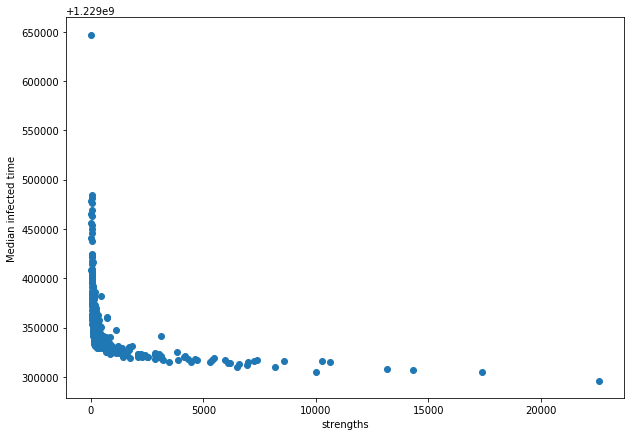

Spearman coef strengths : SpearmanrResult(correlation=-0.9272449243379876, pvalue=3.50500761345155e-120)


In [6]:
#Task 4 cont
from scipy import stats

betweenness = nx.betweenness_centrality(network)
closeness = nx.closeness_centrality(network)
kshell = nx.core_number(network)
clustering_coef = nx.clustering(network)   
degrees = nx.degree(network)
strengths = nx.degree(network, weight = "weight")

betweeness_vec = []
closeness_vec = []
kshell_vec = []
clustering_coef_vec = []
degree_vec = []
strength_vec = []
timemedian_vec = []
for node in network.nodes():
    betweeness_vec.append(betweenness[node])
    closeness_vec.append(closeness[node])
    kshell_vec.append(kshell[node])
    clustering_coef_vec.append(clustering_coef[node])
    degree_vec.append(degrees[node])
    strength_vec.append(strengths[node])
    timemedian_vec.append(time_median[node])

                   
y_values = [betweeness_vec, closeness_vec, kshell_vec, clustering_coef_vec, degree_vec, strength_vec]
y_labels = ["betweenness", "closeness", "kshell", "clustering_coef", "degrees", "strengths"]


for y_val, label in zip(y_values, y_labels):
    fig = plt.figure(figsize=(10,7))
    plt.scatter(y_val, timemedian_vec)
    plt.xlabel(label)
    plt.ylabel("Median infected time")
    plt.show()
    spearman = stats.spearmanr(y_val, timemedian_vec)
    print("Spearman coef " + label + " :", spearman)


In [7]:
import random
random.seed(100)
def infection_model_immunize(network, p, flights, start_node, immunized_node):
    
    #Create dataframe storing airport and infection time 
    airports = sorted(network.nodes())
    inf_time = np.full((len(airports),), np.inf)
    infection = pd.DataFrame({"Airport":airports, "InfectionTime": inf_time}) 
    #Set the infection time of first infected node:
    infection.InfectionTime[start_node] = flights.StartTime.min()
    #Loop over flights and start infection 
    for i in range(len(flights)):
        source = flights.Source[i]
        source_inf_time = infection.InfectionTime[source]
        if (source_inf_time < flights.StartTime[i]) and (source not in immunized_node):
            random = np.random.rand()
            if random <= p:
                target = flights.Destination[i]
                target_cur_inf_time = infection.InfectionTime[target]
                target_new_inf_time = flights.EndTime[i]
                if target_new_inf_time < target_cur_inf_time:
                    infection.InfectionTime[target] = target_new_inf_time
    return infection

In [8]:
#Immunized node:
im_random = []
im_kshell = sorted(kshell, key=kshell.get, reverse=True)[0:9]
im_cluster = sorted(clustering_coef, key=clustering_coef.get, reverse=True)[0:9]
im_degree = []
im_strength = []
im_betweenness = sorted(betweenness, key=betweenness.get, reverse=True)[0:9]
im_closeness = sorted(closeness, key=closeness.get, reverse=True)[0:9]

for i in range(10):
    random = np.random.randint(len(network))
    im_random.append(random)

for u,v in sorted(degrees, key = lambda tup: tup[1], reverse = True)[0:9]:
    im_degree.append(u)

for u,v in sorted(strengths, key = lambda tup: tup[1], reverse = True)[0:9]:
    im_strength.append(u)

im_total = im_random + im_kshell + im_cluster + im_degree + im_strength + im_betweenness + im_closeness
print(im_total)


[95, 21, 39, 225, 153, 231, 222, 5, 43, 108, 1, 2, 3, 4, 5, 10, 12, 15, 16, 0, 264, 148, 163, 143, 118, 127, 60, 67, 4, 3, 7, 5, 12, 31, 34, 27, 48, 4, 3, 7, 12, 16, 24, 31, 15, 5, 4, 7, 3, 27, 5, 34, 12, 41, 31, 4, 3, 7, 5, 12, 34, 31, 27, 24]


In [9]:
#Random start node 
j = 0
start_list = []
while j < 20:
    random = np.random.randint(len(network))
    if random not in im_total:
        start_list.append(random)
        j+=1
print(start_list)

[46, 59, 198, 173, 206, 171, 70, 206, 149, 261, 58, 157, 106, 175, 217, 61, 191, 149, 125, 78]


In [14]:
def immunize_strategy(start_node, immunize_node):
    n = len(network)
    time = np.zeros((len(network),len(start_node)), dtype=float)
    for i in range(20):
        infection_i = infection_model_immunize(network, 0.5 ,flights, start_node, immunize_node)
        time[:,i] = infection_i.InfectionTime
    time_median = np.average(time,axis = 1)
    return time_median



In [ ]:
time_random = immunize_strategy(start_list, im_random)
time_kshell = immunize_strategy(start_list, im_kshell)
time_cluster = immunize_strategy(start_list, im_cluster)
time_degree = immunize_strategy(start_list, im_degree)
time_strength = immunize_strategy(start_list, im_strength)
time_betweenness = immunize_strategy(start_list, im_betweenness)
time_closeness = immunize_strategy(start_list, im_closeness)


(279, 2)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)
(279, 2)


In [ ]:
def immunize_strategy_visualization(star, end, time_strategy):
    stepsize = 30
    t = np.linspace(start, end, stepsize)  #To increase this stepsize
    for j in range (0,stepsize):
            count = (time_strategy < t[j]).sum()
            prob = float(count/len(time_strategy))
            p_t[j,k] = prob
    p_t = np.zeros((stepsize,10), dtype=float)
    plt.plot(t, prevalence, label = label)

label = {"time_random", "time_kshell", "time_cluster", "time_degree", "time_strength", "time_betweennness", "time_closeness"}
for strategy, label in zip({time_random, time_kshell, time_cluster, time_degree, time_strength, time_betweennness, time_closeness},label):
    immunize_strategy_visualization(start_time, end_time, strategy, label)
plt.show()
